---
# 03. Naver Movie Ranking
## 1. 네이버 영화 평점 분석
- 기본 도메인 주소 : https://movie.naver.com/
- 영화랭킹 탭으로 이동
- 영화랭킹에서 평점순(현재상영영화) 선택 : https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210930
- 웹 페이지 주소에는 많은 정보가 담겨있습니다.
- 원하는 정보를 얻기 위해서 변화시켜줘야하는 주소의 규칙을 찾을 수 있습니다.
    - 날짜정보(20210930)를 변경해주면 해당 페이지에 접근이 가능합니다.

In [156]:
# requirements
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [157]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210930"
response = urlopen(url)
#response.status ##200
soup = BeautifulSoup(response, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
   <meta content="네이버영화 " property="me2:post_tag">
    <meta content="네이버영화" property="me2:category1"/>
    <meta content="" property="me2:category2"/>
    <meta content="랭킹 : 네이버 영화" property="og:title"/>
    <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
    <meta content="article" property="og:type"/>
    <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20210930" property="og:url"/>
    <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
    <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
    <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
    <me

In [158]:
# 영화 제목 태그
soup.find_all('div',class_="tit5")
#soup.select("div.tit5")

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=186114" title="밥정">밥정</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=151196" title="원더">원더</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=30688" title="해리 포터와 마법사의 돌">해리 포터와 마법사의 돌</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=199860" title="기적">기적</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=194334" title="부활: 그 증거">부활: 그 증거</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=144379" title="러빙 빈센트">러빙 빈센트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=85825" title="톰보이">톰보이</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=200896" title="꽃다발 같은 사랑을 했다">꽃다발 같은 사랑을 했다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=207364" title="여름날 우리

In [159]:
# 1
soup.find_all("div","tit5")[0].a.string
# 2
soup.select(".tit5")[0].find("a").text
# 3
soup.select(".tit5")[0].select_one("a").get_text()

'밥정'

In [160]:
# 영화 평점 태그
soup.find_all("td","point")[0].text
soup.select(".point")[0].get_text()


'9.63'

In [161]:
# 평점 , 제목 길이
len(soup.select(".point")), len(soup.find_all('div',class_="tit5"))

(42, 42)

In [162]:
soup.find_all("td", class_="point")[0].text #soup.select("td.point")[0].string

'9.63'

In [163]:
# 영화제목 리스트
end = len(soup.find_all('div',class_="tit5"))

movie_name = [] #영화이름 담을 리스트
for n in range(0,end):
    movie_name.append(
        soup.find_all("div",class_="tit5")[n].a.string
    )
#movie_name = [soup.find_all("div",class_="tit5")[n].a.text for n in range(0,end)]
movie_name

['밥정',
 '원더',
 '코다',
 '해리 포터와 마법사의 돌',
 '기적',
 '부활: 그 증거',
 '러빙 빈센트',
 '톰보이',
 '꽃다발 같은 사랑을 했다',
 '여름날 우리',
 '윤희에게',
 '남매의 여름밤',
 '너의 이름은.',
 '위플래쉬',
 '부에나 비스타 소셜 클럽',
 '화양연화',
 '취화선',
 '세자매',
 '캡틴 판타스틱',
 '보이스',
 '노매드랜드',
 '블랙 위도우',
 '링',
 '레토',
 '모가디슈',
 '신은 죽지 않았다 3: 어둠 속의 빛',
 '메기',
 '우리의 20세기',
 '언어의 정원',
 '너의 췌장을 먹고 싶어',
 '날씨의 아이',
 '맨 인 더 다크 2 ',
 '예수는 역사다',
 '고스트 스토리',
 '홀리 모터스',
 '그린 나이트',
 '호우시절',
 '007 노 타임 투 다이',
 '말리그넌트',
 '인질',
 '샹치와 텐 링즈의 전설',
 '싱크홀']

In [164]:
# 영화평점 리스트
end = len(soup.find_all("td","point"))
movie_point = [soup.find_all("td","point")[n].string for n in range(0, end)]
movie_point

['9.63',
 '9.53',
 '9.35',
 '9.35',
 '9.28',
 '9.24',
 '9.22',
 '9.17',
 '9.12',
 '8.99',
 '8.96',
 '8.93',
 '8.80',
 '8.80',
 '8.78',
 '8.77',
 '8.72',
 '8.61',
 '8.59',
 '8.55',
 '8.47',
 '8.47',
 '8.44',
 '8.43',
 '8.35',
 '8.30',
 '8.29',
 '8.25',
 '8.17',
 '8.10',
 '7.96',
 '7.92',
 '7.77',
 '7.65',
 '7.50',
 '7.49',
 '7.40',
 '7.38',
 '7.26',
 '7.25',
 '6.59',
 '6.55']

In [165]:
#전체 데이터 수 확인
len(movie_name), len(movie_point)

(42, 42)

---

## 2. 자동화를 위한 코드
- 날짜만 변경하면 우리가 원하는 기간 만큼 데이터를 얻을 수 있습니다.

In [166]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210930"


In [167]:
date = pd.date_range("2021.03.01", periods = 100, freq="D") #freq : 하루기준으로 100일 만듬
date

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01',
               '2021-04-02', '2021-04-03', '2021-04-04', '2021-04-05',
               '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13',
               '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17',
               '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
               '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25',
      

In [168]:
date[0]

Timestamp('2021-03-01 00:00:00', freq='D')

In [169]:
# 원하는 형태로 수정
date[0].strftime("%Y-%m-%d")
date[0].strftime("%Y.%m.%d")

'2021.03.01'

In [170]:
# 문자열 format
test_string = "Hi, I'm {name}"
test_string.format(name="Zerobase")

"Hi, I'm Zerobase"

In [171]:
#dir(test_string) #문자열에 대해서 쓸수 있는 메서드

In [172]:
import time
from tqdm import tqdm

movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date): #tqdm은 얼마나 진행되는지 보여주는 것 같음... #date는 2021-01-01 ~2021-04-30 까지
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={date}"
    response = urlopen(url.format(date=today.strftime("%Y%m%d"))) #strftime : 날짜형태
    soup = BeautifulSoup(response, "html.parser")

    end = len(soup.findAll("td","point"))

    movie_date.extend([today for _ in range(0, end)])
    movie_name.extend([soup.select("div.tit5")[n].find("a").text for n in range(0,end)])
    movie_point.extend([soup.find_all("td",class_="point")[n].string for n in range(0, end)])

    time.sleep(0.5) 

100%|██████████| 100/100 [03:41<00:00,  2.22s/it]


In [173]:
soup.select("td.point")[0].string, soup.select("td.point")[1].string

('9.39', '9.33')

In [174]:
len(movie_date) , len(movie_name), len(movie_point)

(4961, 4961, 4961)

In [175]:
movie_name[:5]

['디지몬 어드벤처 라스트 에볼루션 : 인연', '원더', '극장판 바이올렛 에버가든', '송가인 더 드라마', '서유기 2 - 선리기연']

In [176]:
movie = pd.DataFrame({
    "date": movie_date,
    "title" : movie_name,
    "point" : movie_point,
})
movie.tail()

,date,title,point
4956,2021-06-08,비와 당신의 이야기,6.69
4957,2021-06-08,스파이럴,6.48
4958,2021-06-08,강변호텔,5.97
4959,2021-06-08,레이니 데이 인 뉴욕,5.63
4960,2021-06-08,어른들은 몰라요,5.05


In [177]:
movie.info() #point를 숫자형태로 바꿔줘야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4961 non-null   datetime64[ns]
 1   title   4961 non-null   object        
 2   point   4961 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 116.4+ KB


In [178]:
movie["point"] = movie["point"].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4961 non-null   datetime64[ns]
 1   title   4961 non-null   object        
 2   point   4961 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 116.4+ KB


In [179]:
# 데이터 저장
movie.to_csv(
    "../data/03. naver_movie_data.csv", sep=",", encoding="utf-8"
)

In [180]:
df = pd.read_csv("../data/03. naver_movie_data.csv", encoding="utf-8", index_col=0)
df[ df["title"]=="코다"]

,date,title,point


---
## 3. 영화 평점 데이터 정리

In [181]:
import numpy as np
import pandas as pd

movie = pd.read_csv("../data/03. naver_movie_data.csv", index_col=0)
movie.tail()

,date,title,point
4956,2021-06-08,비와 당신의 이야기,6.69
4957,2021-06-08,스파이럴,6.48
4958,2021-06-08,강변호텔,5.97
4959,2021-06-08,레이니 데이 인 뉴욕,5.63
4960,2021-06-08,어른들은 몰라요,5.05


- 영화 이름으로 인덱스를 잡습니다.
- 점수의 합산을 구합니다.
- 100일 간 네이버 영화 평점 합산 기준 베스트&워스트 10 선정

In [182]:
# pivot table
movie_unique = pd.pivot_table(data=movie, index="title", aggfunc=np.sum)


In [183]:
movie_best = movie_unique.sort_values(by="point", ascending=False) # 내림차순
movie_best

,point
title,
극장판 귀멸의 칼날: 무한열차편,929.75
해피 투게더,901.54
러브 액츄얼리,893.00
화양연화,878.45
부활: 그 증거,867.47
...,...
초미의 관심사,7.37
지금은맞고그때는틀리다,6.48
신 고질라,4.97


In [184]:
tmp = movie.query("title == ['화양연화']")
tmp.head()

,date,title,point
18,2021-03-01,화양연화,8.78
67,2021-03-02,화양연화,8.78
117,2021-03-03,화양연화,8.79
169,2021-03-04,화양연화,8.79
218,2021-03-05,화양연화,8.79


In [185]:
# 시각화
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgun Gothic")
get_ipython().run_line_magic("matplotlib", "inline")
## 그래프 그리는 설정

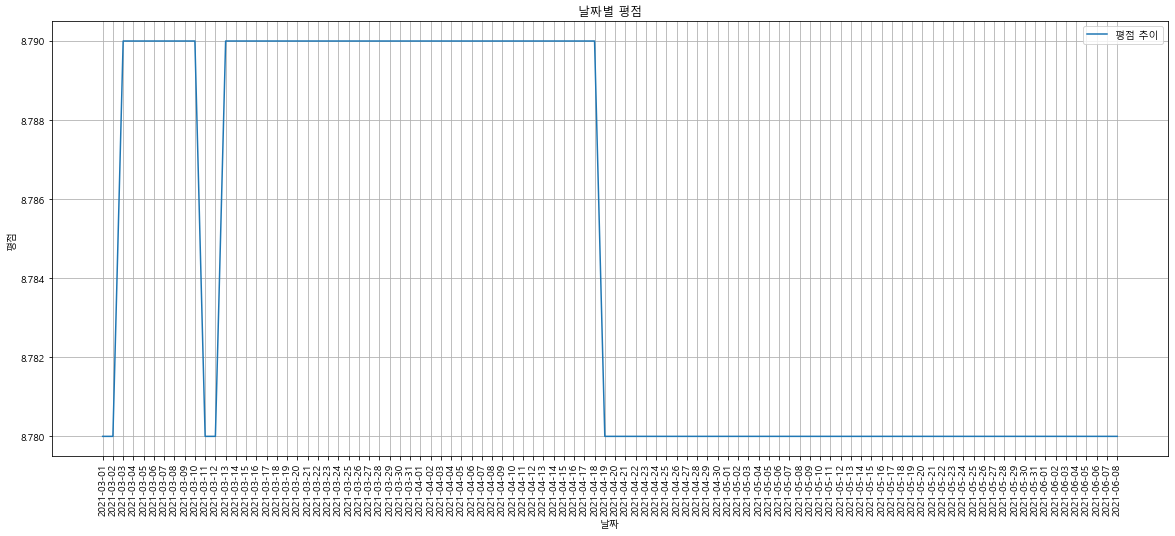

In [186]:
plt.figure(figsize=(20,8)) # x:20 y:8
plt.plot(tmp["date"], tmp["point"]) # x축 : 날짜 , y축 : 평점 => 날짜에 따른 평점 변화를 선그래프로 표현(시계열) 
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.xticks(rotation="vertical")
plt.ylabel("평점")
plt.legend(labels=["평점 추이"], loc="best")
plt.grid(True)
plt.show()

In [187]:
# 상위 10개 영화
movie_best.head(10)

,point
title,
극장판 귀멸의 칼날: 무한열차편,929.75
해피 투게더,901.54
러브 액츄얼리,893.00
화양연화,878.45
부활: 그 증거,867.47
중경삼림,866.01
소울,865.23
라야와 마지막 드래곤,732.36
세자매,693.05


In [188]:
# 하위 10개 영화
movie_best.tail(10)

,point
title,
아랑,14.30
고질라,13.34
크루즈 패밀리,9.23
서복,7.96
분노의 질주: 홉스&쇼,7.84
초미의 관심사,7.37
지금은맞고그때는틀리다,6.48
신 고질라,4.97
당신의 사월,4.81


In [189]:
movie_pivot = pd.pivot_table(data=movie, index="date", columns="title", values="point")
movie_pivot.head()

title,120BPM,1917,500일의 썸머,가나의 혼인잔치: 언약,강변호텔,건축학개론,고질라,고질라 VS. 콩,국가부도의 날,"그 시절, 우리가 좋아했던 소녀",...,피아니스트의 전설,하나와 앨리스,하녀,한여름의 판타지아,해리 포터와 불의 잔,해리 포터와 아즈카반의 죄수,해피 투게더,허트 로커,현기증,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.11,NaN,NaN,8.03,NaN,9.19,NaN,8.72,8.78
2021-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.11,NaN,NaN,8.03,NaN,9.19,NaN,8.72,8.78
2021-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.11,NaN,NaN,8.03,NaN,9.20,NaN,8.72,8.79
2021-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.11,NaN,NaN,8.03,NaN,9.20,NaN,8.72,8.79
2021-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.11,NaN,NaN,8.03,NaN,9.20,NaN,8.72,8.79


In [190]:
movie_pivot.to_excel("../data/03. movie_pivot.xlsx")

In [191]:
#movie_pivot.columns = movie_pivot.columns.droplevel()

In [192]:
import platform
import seaborn as sns
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system()== "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else :
    print("Unkown systm. sorry")

KeyError: "['링', '모가디슈', '보이스'] not in index"

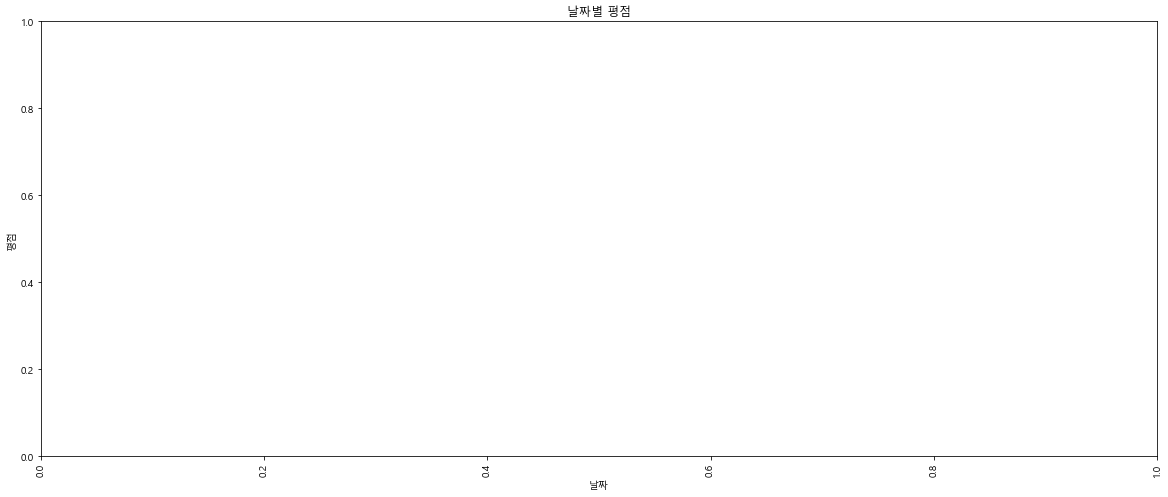

In [193]:
target_col = ["화양연화","링","모가디슈","보이스","세자매"]
plt.figure(figsize=(20,8))
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.ylabel("평점")
plt.xticks(rotation="vertical")
plt.tick_params(bottom="off", labelbottom="off") #x축 눈금표시
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc="best") # lengend는 각 영화를 색상별로... #loc 위치는 best 알아서...
plt.grid(True)
plt.show() 
